In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##### **Cardiovascular Disease Dataset**
- **Source** : [Kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data)
- **Sujet** : Les maladies cardiovasculaires
- **Taille** : 70 000 lignes x 14 colonnes
- **Questions** : Prédire et identifier les facteurs favorisant les crises cardiaques.
- **Description** : C'est le premier ensemble de données que nous avons trouvé, et il est presque parfait, ne présentant aucune donnée manquante.

# **Partie 1: Description des Données**

---



## **Attributs du jeu de données** :


    age : L'âge du patient en années. Il s'agit d'un attribut numérique qui permet de déterminer la tranche d'âge des patients.

    gender : Le genre du patient (1 pour femme, 2 pour homme). Cet attribut catégorique permet de différencier les patients par genre.

    height : La taille du patient en centimètres. C'est un attribut numérique essentiel pour évaluer la morphologie des patients.

    weight : Le poids du patient en kilogrammes. Cet attribut numérique est important pour évaluer la composition corporelle des patients.

    ap_hi : La pression artérielle systolique. Cet attribut numérique est essentiel pour évaluer la santé cardiovasculaire.

    _lo** : La pression artérielle diastolique. Cet attribut numérique complète l'évaluation de la pression artérielle.

    cholesterol : Le niveau de cholestérol (1 pour normal, 2 pour élevé, 3 pour très élevé). C'est un attribut catégorique important pour évaluer la santé cardiaque.

    gluc : Le niveau de glucose (1 pour normal, 2 pour élevé, 3 pour très élevé). Cet attribut catégorique est essentiel pour évaluer les niveaux de sucre dans le sang.

    smoke : Le statut de fumeur (0 pour non-fumeur, 1 pour fumeur). C'est un attribut catégorique qui peut être lié aux problèmes cardiovasculaires.

    alco : La consommation d'alcool (0 pour non buveur, 1 pour buveur). Cet attribut catégorique est lié aux habitudes de consommation d'alcool des patients.

    active : Le niveau d'activité physique (0 pour inactif, 1 pour actif). Cet attribut catégorique reflète le niveau d'exercice physique des patients.

    cardio : La présence de maladie cardiovasculaire (0 pour absent, 1 pour présent). Cet attribut catégorique est la variable cible de notre analyse.




## **Taille du jeu de données :**

    Le jeu de données contient un total de 70 000 exemples.
    Il y a 13 colonnes, chacune contenant des informations sur les patients.





## **Question que l'on peut se poser sur CardioVascular (AVC)**

Le premier ensemble de données provient de Kaggle et se concentre sur les maladies cardiovasculaires. Composé de 70 000 lignes et 14 colonnes, cet ensemble est presque parfait, dépourvu de toute donnée manquante. Les questions abordées dans cette analyse incluent l'identification des principaux facteurs de risque, la corrélation entre l'âge et les crises cardiaques, et l'impact du tabagisme sur la santé cardiovasculaire.

- Quels sont les principaux facteurs de risque identifiés dans le dataset pour les maladies cardiovasculaires (AVC)?
- Existe-t-il une corrélation significative entre l'âge et la prédisposition aux crises cardiaques?
- Quels sont les attributs les plus influents dans la prédiction des crises cardiaques?
- Y a-t-il une différence significative entre les sexes en termes de prévalence des maladies cardiovasculaires(AVC)?
- Comment les niveaux de cholestérol et de pression artérielle sont-ils liés aux crises cardiaques?
- Existe-t-il une relation entre le tabagisme et les maladies cardiovasculaires dans ce dataset?
- Quels sont les groupes d'âge les plus vulnérables aux maladies cardiovasculaires d'après les données?
- La présence de diabète est-elle fortement associée aux cas de maladies cardiovasculaires(AVC)?
- Comment la répartition géographique des participants est-elle liée aux maladies cardiovasculaires(AVC)?
- Quel est le rôle de l'activité physique dans la prévention des crises cardiaques selon ce dataset(AVC)?

# **Partie 3 : Graphiques et Visualisations**

Dans cette section, nous allons générer des graphiques et des visualisations pour mieux comprendre le jeu de données sur les maladies cardiovasculaires. Chaque graphique sera accompagné d'une explication détaillée.


## **Visualisation de l'âge des patients**

Commençons par examiner la répartition de l'âge des patients. Pour ce faire, nous créons un histogramme de l'âge des patients.

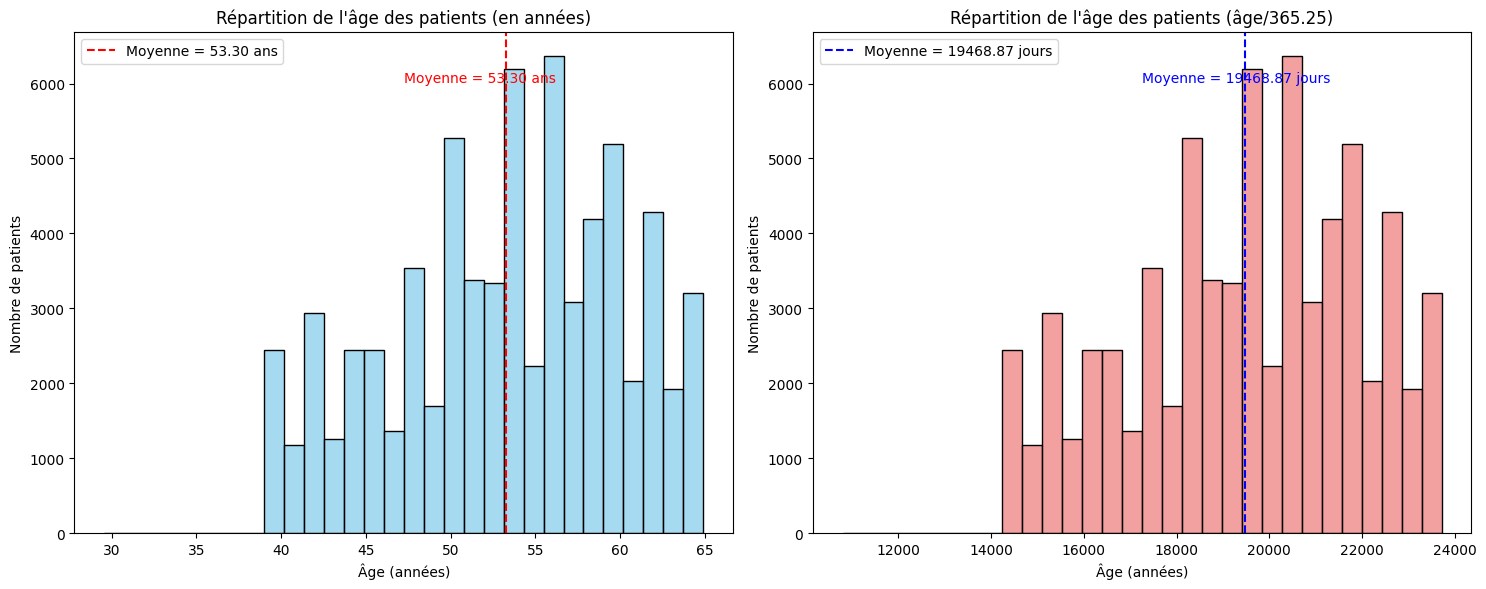

In [3]:
# Calculer la moyenne de l'âge des patients
mean_age = df['age'].mean()
mean_age_years = mean_age / 365.25

# Créer un subplot avec deux graphiques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Premier graphique : Répartition de l'âge des patients en années
sns.histplot(df['age'] / 365.25, bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title("Répartition de l'âge des patients (en années)")
axes[0].set_xlabel("Âge (années)")
axes[0].set_ylabel("Nombre de patients")

# Ajouter une ligne verticale pour la moyenne et afficher la valeur moyenne
axes[0].axvline(mean_age_years, color='red', linestyle='--', label=f'Moyenne = {mean_age_years:.2f} ans')
axes[0].legend()

# Deuxième graphique : Répartition de l'âge des patients en années (âge/365.25)
sns.histplot(df['age'], bins=30, kde=False, color='lightcoral', ax=axes[1])
axes[1].set_title("Répartition de l'âge des patients (âge/365.25)")
axes[1].set_xlabel("Âge (années)")
axes[1].set_ylabel("Nombre de patients")

# Ajouter une ligne verticale pour la moyenne et afficher la valeur moyenne
axes[1].axvline(mean_age, color='blue', linestyle='--', label=f'Moyenne = {mean_age:.2f} jours')
axes[1].legend()

# Afficher la valeur moyenne en tant que texte
axes[0].text(0.5, 0.9, f'Moyenne = {mean_age_years:.2f} ans', color='red', transform=axes[0].transAxes)
axes[1].text(0.5, 0.9, f'Moyenne = {mean_age:.2f} jours', color='blue', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


Nous disposons des âges des individus en jours, en tenant compte d'une année de 365,25 jours. Notre analyse révèle que les individus de ce jeu de données ont des âges compris entre 40 ans et 65 ans, avec un âge moyen de 53,3 ans. Il est important de noter qu'aucun individu de moins de 40 ans n'a été inclus dans l'échantillon, ce qui indique que la majorité des personnes sondées sont âgées de 40 ans ou plus.

C:\Users\talla\AppData\Local\Temp\ipykernel_10836\3477270111.py:12: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = age_cardio_percentage[['Crise Cardiovasculaire (%)', 'Sans Crise Cardiovasculaire (%)']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca(), color=['red', 'green'])


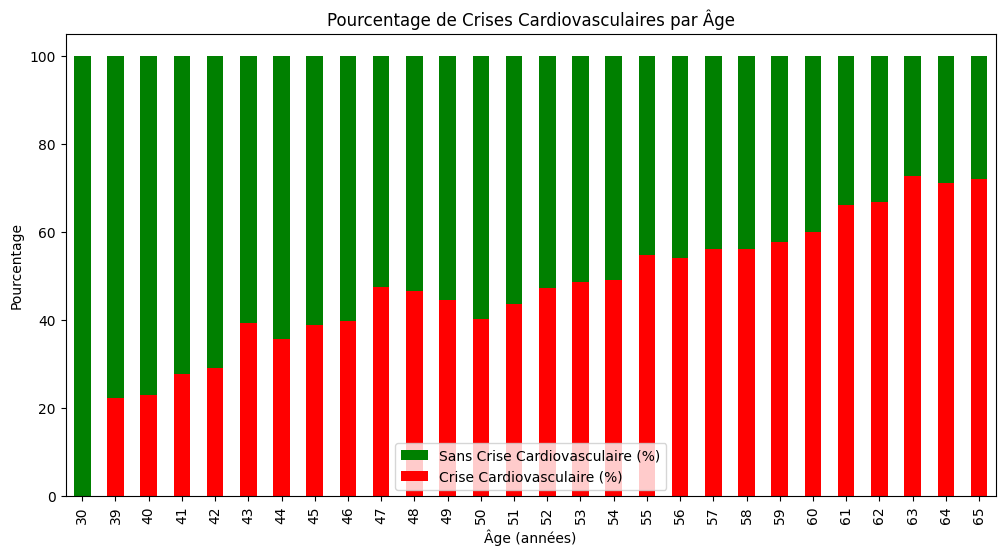

In [4]:
# Arrondir l'âge à l'entier le plus proche
df['age_rounded'] = (df['age'] / 365.25).round(0).astype(int)

# Calculer le pourcentage de crises cardiaques et non-crise cardiaque par âge
age_cardio_percentage = df.groupby(['age_rounded', 'cardio']).size().unstack('cardio').fillna(0)
age_cardio_percentage['Total'] = age_cardio_percentage.sum(axis=1)
age_cardio_percentage['Crise Cardiovasculaire (%)'] = (age_cardio_percentage[1] / age_cardio_percentage['Total']) * 100
age_cardio_percentage['Sans Crise Cardiovasculaire (%)'] = (age_cardio_percentage[0] / age_cardio_percentage['Total']) * 100

# Créer le graphique en barres empilées avec couleurs personnalisées
plt.figure(figsize=(12, 6))
ax = age_cardio_percentage[['Crise Cardiovasculaire (%)', 'Sans Crise Cardiovasculaire (%)']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca(), color=['red', 'green'])

plt.xlabel("Âge (années)")
plt.ylabel("Pourcentage")
plt.title("Pourcentage de Crises Cardiovasculaires par Âge")

# Personnaliser la légende
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()

Nous tentons de réaliser une étude sur le risque de subir une crise cardiaque en fonction de l'âge.

Nous constatons que linéairement, les individus âgés de 39 à 47 ans ont de plus en plus de chances d'être atteints d'une maladie cardiaque à mesure qu'ils vieillissent. Cette tendance se stabilise ensuite avant de connaître une nouvelle augmentation, dépassant ainsi le pourcentage de chances de rencontrer une personne ayant déjà subi une crise cardiaque.

In [5]:
  

# Regrouper les données par âge arrondi et compter le nombre d'occurrences
age_counts = df['age_rounded'].value_counts().reset_index()
age_counts.columns = ['Age (années arrondies)', 'Nombre de personnes']

# Trier le tableau par âge en années arrondies en ordre croissant
age_counts = age_counts.sort_values(by='Age (années arrondies)')

# Réindexer le tableau après le tri
age_counts = age_counts.reset_index(drop=True)

# Afficher le tableau des personnes par âge en années arrondies en ordre croissant
print(age_counts)

    Age (années arrondies)  Nombre de personnes
0                       30                    4
1                       39                  470
2                       40                 2676
3                       41                  777
4                       42                 2602
5                       43                  733
6                       44                 2805
7                       45                  790
8                       46                 2923
9                       47                  793
10                      48                 3167
11                      49                 1123
12                      50                 5242
13                      51                 1377
14                      52                 5279
15                      53                 1460
16                      54                 5961
17                      55                 1584
18                      56                 5944
19                      57              

Nous constatons que le plus jeune âge parmi les individus sondés est de 30 ans, et il y a un total de 4 personnes ayant cet âge. Il s'agit de l'âge minimum observé dans notre échantillon

## **Répartitions des sexes**

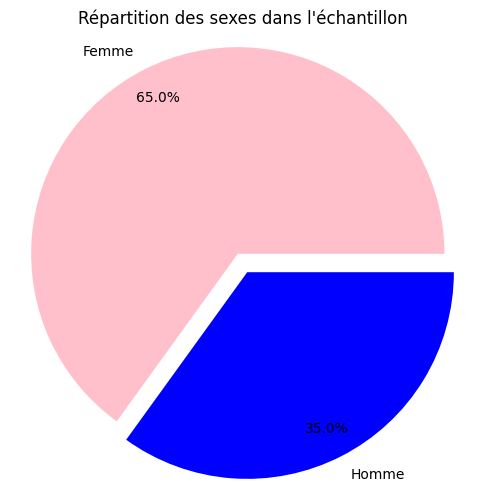

In [6]:
# Compter le nombre de femmes et d'hommes
gender_counts = df['gender'].value_counts()

# Créer un camembert avec le texte à l'extérieur
plt.figure(figsize=(6, 6))
colors = ['pink', 'blue']
labels = ['Femme', 'Homme']
explode = (0.1, 0)  # Pour séparer légèrement le secteur "Femme"
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
plt.title("Répartition des sexes dans l'échantillon")
plt.axis('equal')  # Pour que le camembert soit un cercle

plt.show()

Notre objectif est d'analyser la répartition des sexes parmi les individus sondés. Ce camembert révèle une disparité marquée, avec environ deux tiers de femmes et un tiers d'hommes, indiquant ainsi que les femmes sont deux fois plus nombreuses parmi les sondés.

## **Impact du genre sur les maladies cardiovasculaires**

Analysons maintenant l'impact du genre sur la présence de maladies cardiovasculaires. Nous utilisons deux  graphique en camenbert pour montrer la répartition des maladies cardiovasculaires par genre.

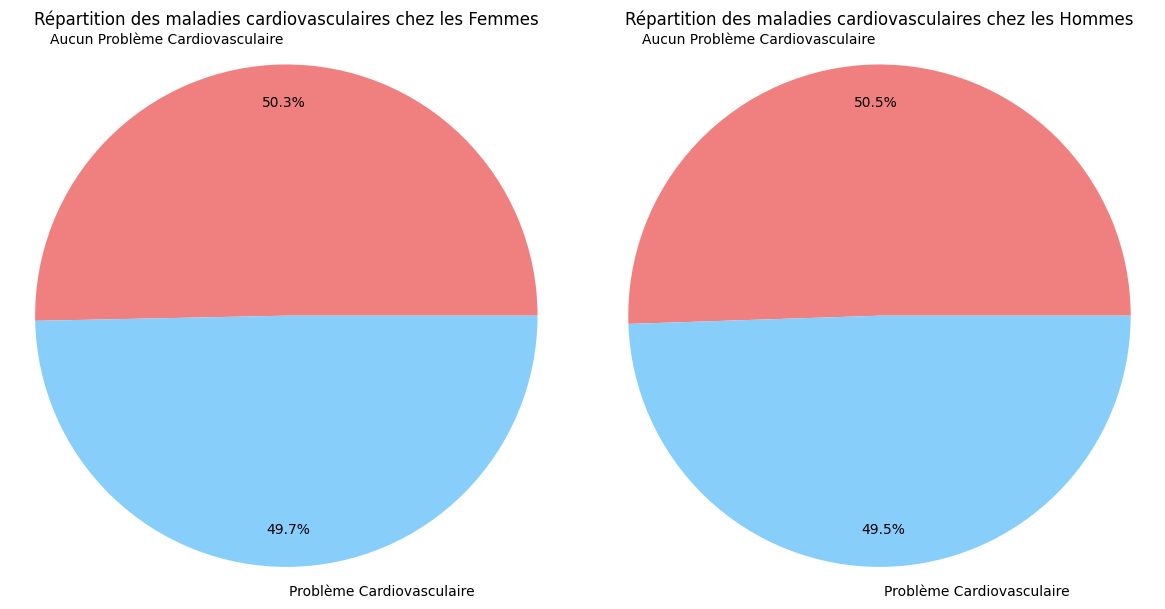

In [7]:

# Séparer les données en fonction du genre (homme ou femme)
df_femmes = df[df['gender'] == 1]
df_hommes = df[df['gender'] == 2]

# Compter le nombre de femmes avec ou sans maladie cardiovasculaire
femmes_cardio_counts = df_femmes['cardio'].value_counts()
femmes_labels = ['Aucun Problème Cardiovasculaire', 'Problème Cardiovasculaire']

# Compter le nombre d'hommes avec ou sans maladie cardiovasculaire
hommes_cardio_counts = df_hommes['cardio'].value_counts()
hommes_labels = ['Aucun Problème Cardiovasculaire', 'Problème Cardiovasculaire']

# Créer un subplot avec deux camemberts
plt.figure(figsize=(12, 6))

# Camembert pour les femmes
plt.subplot(1, 2, 1)
colors = ['lightcoral', 'lightskyblue']
plt.pie(femmes_cardio_counts, labels=femmes_labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.gca().set_title("Répartition des maladies cardiovasculaires chez les Femmes", pad=20)  # Ajout de l'espace entre le titre et le camembert
plt.axis('equal')

# Camembert pour les hommes
plt.subplot(1, 2, 2)
colors = ['lightcoral', 'lightskyblue']
plt.pie(hommes_cardio_counts, labels=hommes_labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.gca().set_title("Répartition des maladies cardiovasculaires chez les Hommes", pad=20)  # Ajout de l'espace entre le titre et le camembert
plt.axis('equal')

plt.tight_layout()  # Pour éviter que les camemberts se chevauchent

# Afficher le subplot
plt.show()

Lors de l'analyse graphique, il semblerait que l'on puisse tirer les conclusions suivantes. Il est pertinent de noter qu'une légère disparité existe entre les femmes et les hommes en ce qui concerne le nombre d'individus ayant ou n'ayant pas connu de crises cardiovasculaires. Par conséquent, il est possible de conclure que les femmes présentent une légère prédisposition à développer des problèmes cardiovasculaires.

Toutefois, il convient de prendre en compte que l'échantillon étudié comprend deux fois plus de femmes que d'hommes. Cette déséquilibre dans la composition de l'échantillon peut influencer les résultats. Par conséquent, nous considérons que les hommes et les femmes ont une probabilité équivalente de subir une crise cardiaque, soit un pourcentage de 1/2 chacun.

## **Niveaux de cholestérol et de glucose**

Examinons maintenant les niveaux de cholestérol et de glucose chez les patients. Nous utilisons un nuage de points pour montrer ces niveaux.

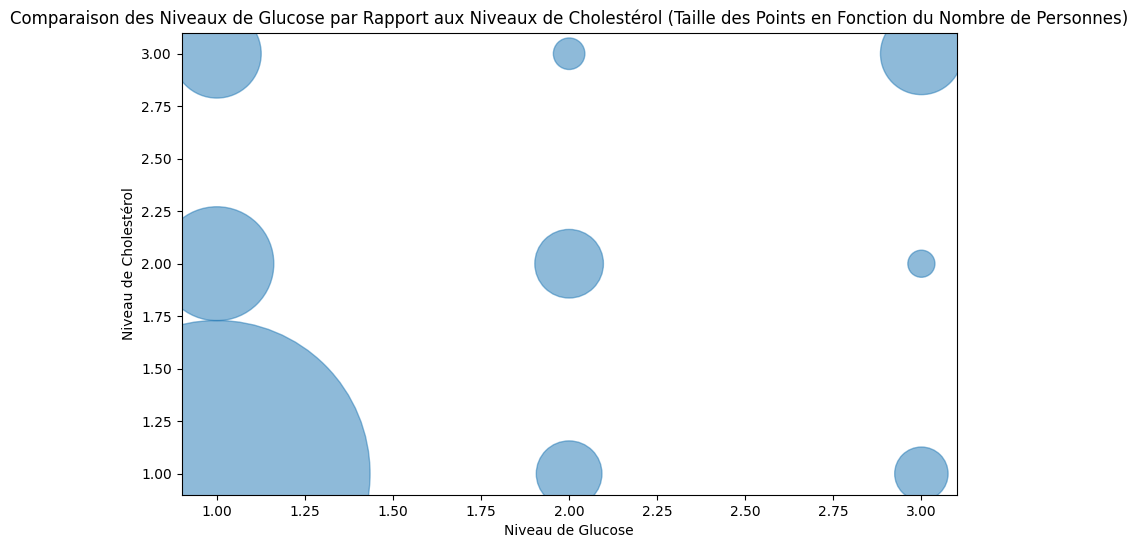

In [8]:
# Groupement des données par les niveaux de glucose et de cholestérol et comptage du nombre de personnes
grouped_data = df.groupby(['gluc', 'cholesterol']).size().reset_index(name='count')

# Créer un nuage de points avec des variations de la taille des points en fonction du nombre de personnes
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['gluc'], grouped_data['cholesterol'], s=grouped_data['count'], alpha=0.5)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel("Niveau de Glucose")
plt.ylabel("Niveau de Cholestérol")
plt.title("Comparaison des Niveaux de Glucose par Rapport aux Niveaux de Cholestérol (Taille des Points en Fonction du Nombre de Personnes)")

plt.show()

Nous pouvons ainsi constater que la majorité des individus présentent des niveaux de cholestérol et de glucose normaux. Environ la même densité de cas se retrouve pour les combinaisons de niveaux élevés-élevés, normaux-élevés, et normaux-très élevés.

Une proportion plus importante concerne les combinaisons élevés-normaux, très élevés-normaux, et très élevés-très élevés.

En revanche, une minorité d'individus présente les combinaisons très élevés-élevés et élevés-très élevés.

Cela reflète la diversité des profils de niveaux de glucose et de cholestérol au sein de l'échantillon.

## **Impact de la consommation d'alcool et du tabagisme sur les maladies cardiovasculaires**

Nous allons analyser la relation entre le tabagisme, la consommation d'alcool et les problèmes cardiaques.

Pour commencer, nous allons examiner le nombre d'individus en fonction de leur consommation de tabac, d'alcool ou des deux.

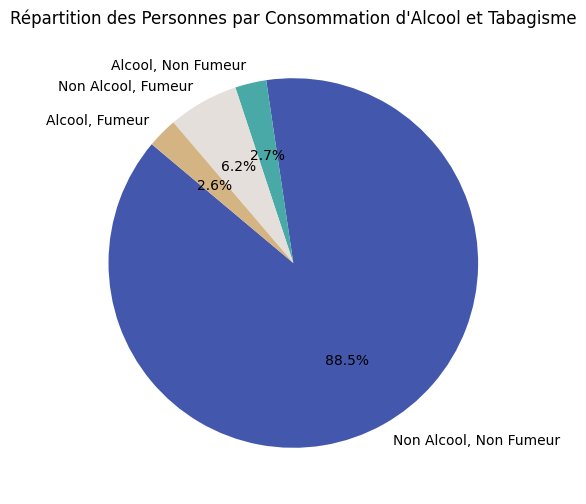

In [9]:
# Filtrer les données en fonction de la consommation d'alcool et du tabagisme
df_non_alco_nonsmoke = df[(df['alco'] == 0) & (df['smoke'] == 0)]
df_alco_nonsmoke = df[(df['alco'] == 1) & (df['smoke'] == 0)]
df_non_alco_smoke = df[(df['alco'] == 0) & (df['smoke'] == 1)]
df_alco_smoke = df[(df['alco'] == 1) & (df['smoke'] == 1)]

# Compter le nombre de personnes dans chaque groupe
counts = [len(df_non_alco_nonsmoke), len(df_alco_nonsmoke), len(df_non_alco_smoke), len(df_alco_smoke)]
labels = ['Non Alcool, Non Fumeur', 'Alcool, Non Fumeur', 'Non Alcool, Fumeur', 'Alcool, Fumeur']

# Couleurs spécifiées
colors = ['#4357AD', '#48A9A6', '#E4DFDA', '#D4B483']

# Créer un graphique en camembert avec les couleurs spécifiées
plt.figure(figsize=(12, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Répartition des Personnes par Consommation d'Alcool et Tabagisme")

plt.show()

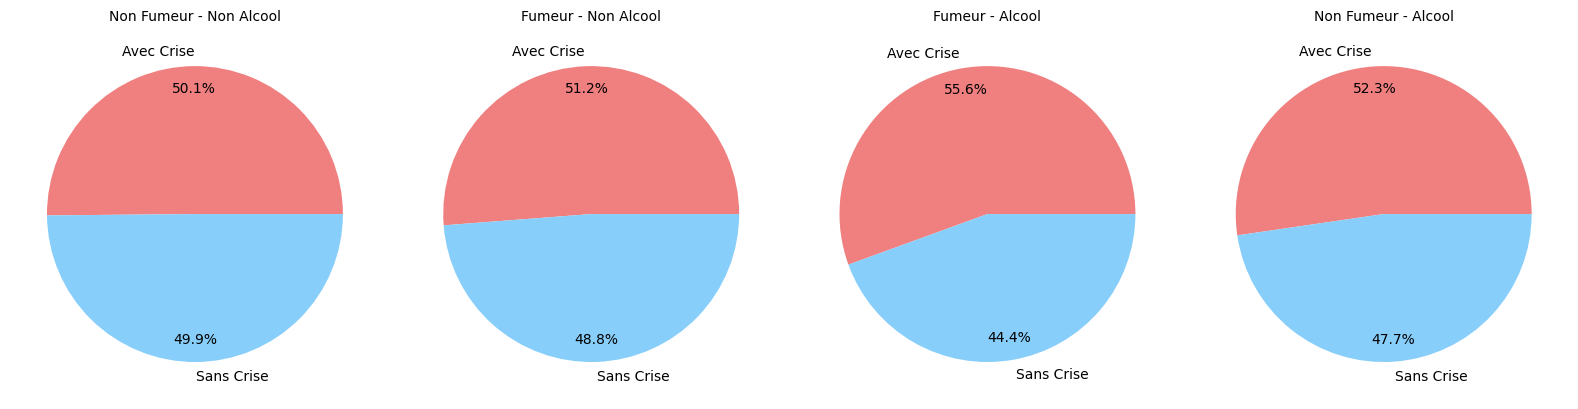

In [10]:
# Créer un subplot avec 1 ligne et 4 colonnes
plt.figure(figsize=(16, 4))

# Catégorie 1 : Non fumeur - Non Alcool
plt.subplot(1, 4, 1)
non_fumeur_non_alcool = df[(df['smoke'] == 0) & (df['alco'] == 0)]
counts = non_fumeur_non_alcool['cardio'].value_counts()
labels = ['Avec Crise', 'Sans Crise']
colors = ['lightcoral', 'lightskyblue']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Non Fumeur - Non Alcool", fontsize=10)

# Catégorie 2 : Fumeur - Non Alcool
plt.subplot(1, 4, 2)
fumeur_non_alcool = df[(df['smoke'] == 1) & (df['alco'] == 0)]
counts = fumeur_non_alcool['cardio'].value_counts()
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Fumeur - Non Alcool", fontsize=10)

# Catégorie 3 : Fumeur - Alcool
plt.subplot(1, 4, 3)
fumeur_alcool = df[(df['smoke'] == 1) & (df['alco'] == 1)]
counts = fumeur_alcool['cardio'].value_counts()
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Fumeur - Alcool", fontsize=10)

# Catégorie 4 : Non fumeur - Alcool
plt.subplot(1, 4, 4)
non_fumeur_alcool = df[(df['smoke'] == 0) & (df['alco'] == 1)]
counts = non_fumeur_alcool['cardio'].value_counts()
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
plt.title("Non Fumeur - Alcool", fontsize=10)

plt.tight_layout()  # Pour éviter que les camemberts se chevauchent

# Afficher le subplot
plt.show()


Nous avons donc quatre camemberts qui illustrent quatre situations différentes :

- Pour la première situation, "Non fumeur - Non alcool", nous pouvons observer que les chances de subir une crise cardiaque ou de ne pas en subir sont équivalentes, soit 50% pour chacune des deux possibilités.

- Dans le cas de "Fumeur - Non alcool", nous observons une légère augmentation du nombre de crises, d'environ 1%.

- De même, "Non fumeur - Alcool" présente également une légère augmentation d'environ 2%.

- Enfin, pour les consommateurs de tabac et d'alcool, nous constatons une augmentation plus significative, d'environ 6%.

Ainsi, nous pouvons conclure que la consommation d'alcool et de tabac est associée à une augmentation du pourcentage de crises cardiaques, bien que ce pourcentage reste modéré, sans être ni trop faible ni excessif.

## **Visualisation de la pression artérielle systolique et prétraitement**

Toutes les données sont de nature numérique, de ce côté, tout est correct. Cependant, une observation graphique des variables ap_hi et ap_ho a révélé une dispersion excessive. Nous avons entrepris d'identifier l'origine des erreurs, sachant que les fautes de frappe ne peuvent être corrigées que partiellement, en particulier les valeurs comportant des chiffres superflus.

Les valeurs négatives ont été rectifiées en appliquant la valeur absolue. Nous avons également identifié d'autres erreurs liées à des conversions d'unités incorrectes ou à l'ajout de zéros superflus. Nous avons défini les intervalles à corriger ainsi que la méthode, comme illustré dans les équations suivantes :



\begin{equation}
\text{ap}_{\text{hi}} =
\begin{cases}
x & \text{si } x \leq 250 \\
\frac{x}{10} & \text{sinon}
\end{cases}
\end{equation}



\begin{equation}
\text{ap}_{\text{lo}} =
\begin{cases}
x & \text{si } x \leq 250 \\
\frac{x}{10} & \text{sinon}
\end{cases}
\end{equation}



\begin{equation}
\text{ap}_{\text{hi}} =
\begin{cases}
x & \text{si } x \leq 1700 \\
\frac{x}{100} & \text{sinon}
\end{cases}
\end{equation}



\begin{equation}
\text{ap}_{\text{lo}} =
\begin{cases}
x & \text{si } x \leq 1700 \\
\frac{x}{100} & \text{sinon}
\end{cases}
\end{equation}


Ces ajustements ont été effectués pour améliorer la qualité des données et garantir la cohérence des mesures.


Voici un premier aperçu.

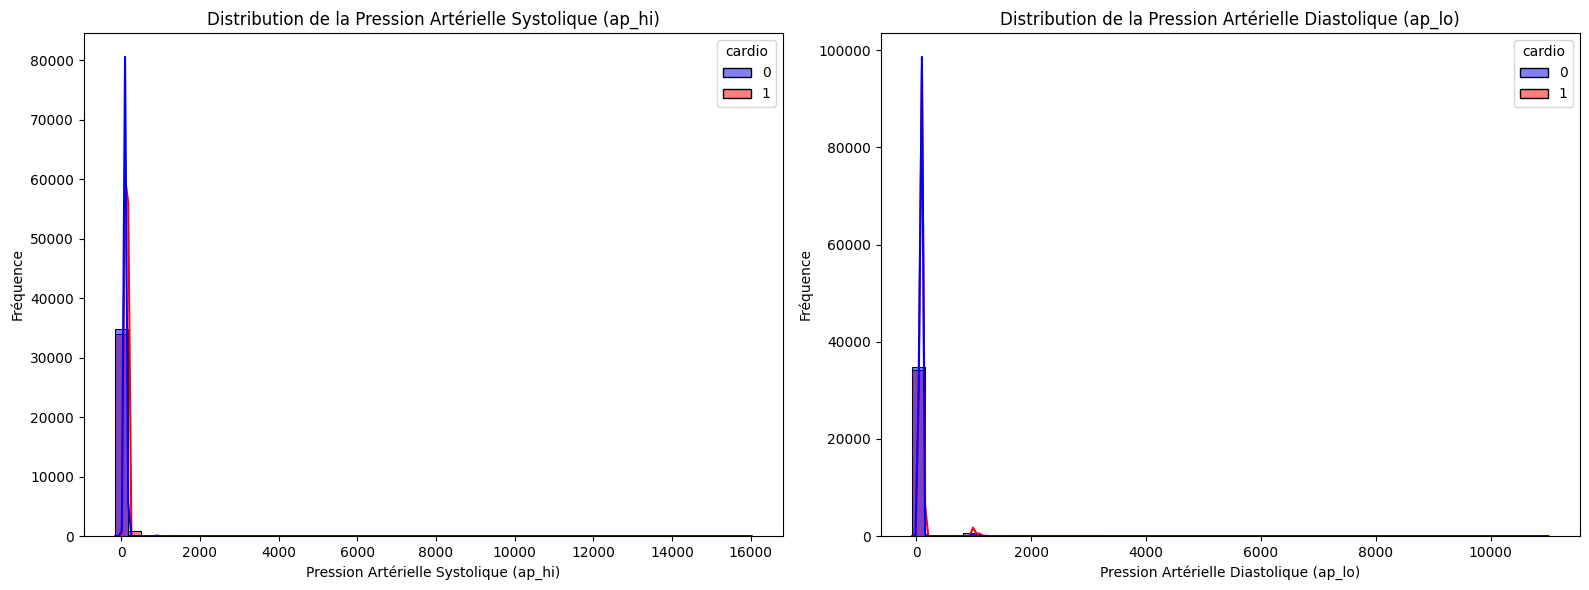

In [11]:
# Créer une figure avec un subplot 1x2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tracer l'histogramme de la pression artérielle systolique (ap_hi)
sns.histplot(data=df, x='ap_hi', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel('Pression Artérielle Systolique (ap_hi)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la Pression Artérielle Systolique (ap_hi)')

# Tracer l'histogramme de la pression artérielle diastolique (ap_lo)
sns.histplot(data=df, x='ap_lo', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[1])
axes[1].set_xlabel('Pression Artérielle Diastolique (ap_lo)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution de la Pression Artérielle Diastolique (ap_lo)')

plt.tight_layout()
plt.show()

Ce graphique est incompréhensible. Nous observons des valeurs extrêmes qui étirent considérablement le graphique. Après notre correction, voici le résultat :

In [12]:
# Première exécution des modifications
df['ap_hi'] = df['ap_hi'].abs()
df['ap_lo'] = df['ap_lo'].abs()
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_hi'] = df['ap_hi'].round(2)
df['ap_lo'] = df['ap_lo'].round(2)

# Deuxième exécution des modifications pour s'assurer que les valeurs sont correctes
df['ap_hi'] = df['ap_hi'].abs()
df['ap_lo'] = df['ap_lo'].abs()
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 250 else x / 10)
df['ap_hi'] = df['ap_hi'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_lo'] = df['ap_lo'].apply(lambda x: x if x <= 1700 else x / 100)
df['ap_hi'] = df['ap_hi'].round(2)
df['ap_lo'] = df['ap_lo'].round(2)

# Vous avez maintenant les données modifiées après deux exécutions.


In [13]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_rounded
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0,48


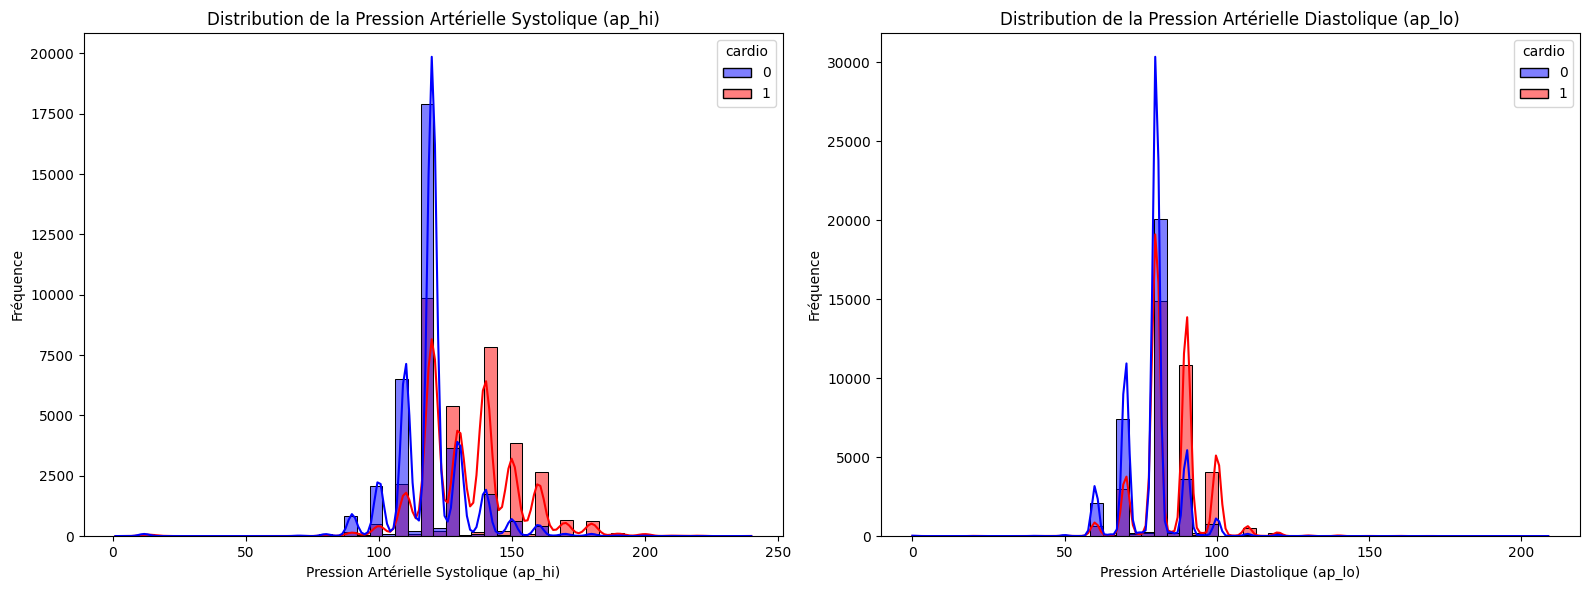

In [14]:
# Créer une figure avec un subplot 1x2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tracer l'histogramme de la pression artérielle systolique (ap_hi)
sns.histplot(data=df, x='ap_hi', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel('Pression Artérielle Systolique (ap_hi)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la Pression Artérielle Systolique (ap_hi)')

# Tracer l'histogramme de la pression artérielle diastolique (ap_lo)
sns.histplot(data=df, x='ap_lo', hue='cardio', bins=50, kde=True, palette={0: 'blue', 1: 'red'}, ax=axes[1])
axes[1].set_xlabel('Pression Artérielle Diastolique (ap_lo)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution de la Pression Artérielle Diastolique (ap_lo)')

plt.tight_layout()
plt.show()

Ainsi, moins la pression artérielle systolique ou diastolique est élevée, moins nous observons de cas de crise cardiaque. Cependant, les crises cardiaques deviennent plus fréquentes aux alentours de 135 pour ap_hi et 90 pour ap_lo. En dessous de ces valeurs, la majorité des personnes n'ont pas connu de crise cardiaque.

## **Impact de l'activité physique**

Analysons l'impact de l'activité physique sur les maladies cardiovasculaires.

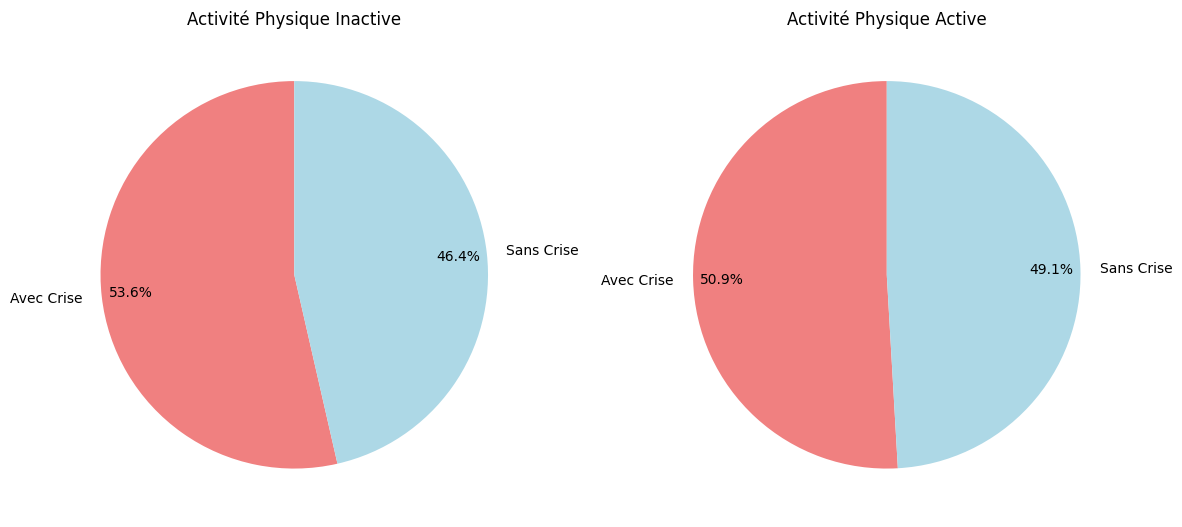

In [15]:
# Créer une figure avec deux sous-plots en forme de camembert
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Données pour l'activité physique inactive
inactive_df = df[df['active'] == 0]
inactive_counts = inactive_df['cardio'].value_counts()
labels = ['Avec Crise', 'Sans Crise']
colors = ['lightcoral', 'lightblue']

# Créer un camembert pour l'activité physique inactive
axes[0].pie(inactive_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
axes[0].set_title("Activité Physique Inactive")

# Données pour l'activité physique active
active_df = df[df['active'] == 1]
active_counts = active_df['cardio'].value_counts()

# Créer un camembert pour l'activité physique active
axes[1].pie(active_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
axes[1].set_title("Activité Physique Active")

# Afficher les deux camemberts
plt.tight_layout()
plt.show()

Nous pouvons constater que l'absence d'activité sportive semble légèrement augmenter les risques de crise cardiaque.



## **Conclusions**

Ces visualisations fournissent un aperçu approfondi de certaines caractéristiques importantes du jeu de données sur les maladies cardiovasculaires. Nous avons exploré l'âge des patients, l'impact du genre, les niveaux de cholestérol et de glucose, la consommation d'alcool et le tabagisme, la pression artérielle systolique, ainsi que l'impact de l'activité physique sur les maladies cardiovasculaires. Ces informations serviront de base à des analyses plus avancées et à la construction de modèles prédictifs pour la santé cardiaque des patients.

# **Partie 4: Ajout des nouveaux parametre **



In [16]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df.head()





,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_rounded,BMI
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,0,0,0,48,23.011177


In [17]:
  

# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['Insulin'] = np.random.randint(0, 847, size=len(df))


In [18]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['Pregnancies'] = np.random.randint(0, 17, size=len(df))


In [19]:
# Définir une fonction pour générer des valeurs aléatoires en fonction de la catégorie
def generer_valeur_aleatoire(categorie):
    if categorie == 1:
        return np.random.randint(0, 100)
    elif categorie == 2:
        return np.random.randint(100, 126)
    elif categorie == 3:
        return np.random.randint(125, 200)

# Appliquer la fonction à la colonne "Glucose_categories"
df['Glucose_categories'] = df['gluc'].apply(generer_valeur_aleatoire)# Définir une fonction pour générer des valeurs aléatoires en fonction de la catégorie
def generer_valeur_aleatoire(categorie):
    if categorie == 1:
        return np.random.randint(0, 100)
    elif categorie == 2:
        return np.random.randint(100, 126)
    elif categorie == 3:
        return np.random.randint(125, 200)

# Appliquer la fonction à la colonne "Glucose_categories"
df['Glucose_categories'] = df['gluc'].apply(generer_valeur_aleatoire)

In [20]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['DiabetesPedigreeFunction'] = np.random.randint(0.078, 2.42, size=len(df))

In [21]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['SkinThickness'] = np.random.randint(0, 99, size=len(df))

In [22]:
df['BloodPressure'] =df['ap_lo']

In [23]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,active,cardio,age_rounded,BMI,Insulin,Pregnancies,Glucose_categories,DiabetesPedigreeFunction,SkinThickness,BloodPressure
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,...,1,0,50,21.967120,95,7,48,1,84,80.0
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,...,1,1,55,34.927679,201,2,91,0,10,90.0
2,2,18857,1,165,64.0,130.0,70.0,3,1,0,...,0,1,52,23.507805,81,4,73,1,85,70.0
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,...,1,1,48,28.710479,268,4,68,1,55,100.0
4,4,17474,1,156,56.0,100.0,60.0,1,1,0,...,0,0,48,23.011177,376,13,15,0,9,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120.0,80.0,1,1,1,...,1,0,53,26.927438,777,3,84,1,4,80.0
69996,99995,22601,1,158,126.0,140.0,90.0,2,2,0,...,1,1,62,50.472681,3,0,107,1,45,90.0
69997,99996,19066,2,183,105.0,180.0,90.0,3,1,0,...,0,1,52,31.353579,450,11,97,0,0,90.0
69998,99998,22431,1,163,72.0,135.0,80.0,1,2,0,...,0,1,61,27.099251,722,3,101,0,11,80.0


In [24]:

df.rename(columns={'age_rounded': 'Age'}, inplace=True)
df.rename(columns={'Glucose_categories': 'Glucose'}, inplace=True)

In [25]:
import joblib

# Load the trained model
model = joblib.load('knnmodele.pkl')

# Extract the relevant features from your DataFrame
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Make predictions
predictions = model.predict(features)

# Add the predictions as a new column to your DataFrame
df['Diabetes'] = predictions

# Display the updated DataFrame
print(df)


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\tal

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0  110.0   80.0            1     1   
1          1  20228       1     156    85.0  140.0   90.0            3     1   
2          2  18857       1     165    64.0  130.0   70.0            3     1   
3          3  17623       2     169    82.0  150.0  100.0            1     1   
4          4  17474       1     156    56.0  100.0   60.0            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0  120.0   80.0            1     1   
69996  99995  22601       1     158   126.0  140.0   90.0            2     2   
69997  99996  19066       2     183   105.0  180.0   90.0            3     1   
69998  99998  22431       1     163    72.0  135.0   80.0            1     2   
69999  99999  20540       1     170    72.0  120.0   80.0            2     1   

       smoke  ...  cardio  Age        B

In [26]:
count_diabetes_positive = len(df[df['Diabetes'] == 1])
print("Number of rows with Diabetes equal to 1:", count_diabetes_positive)

Number of rows with Diabetes equal to 1: 31833


In [27]:
count_diabetes_positive = len(df[df['Diabetes'] == 0])
print("Number of rows with Diabetes equal to 0:", count_diabetes_positive)

Number of rows with Diabetes equal to 0: 38167


In [28]:
#drop id
#df = df.drop('id', axis=1)

# print(df)
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

60686

In [29]:
df[df['ap_lo']> df['ap_hi']].shape[0]
df['age'] = (df['age'] / 365).round().astype('int')

print(df.head())

   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0  110.0   80.0            1     1      0   
1   1   55       1     156    85.0  140.0   90.0            3     1      0   
2   2   52       1     165    64.0  130.0   70.0            3     1      0   
3   3   48       2     169    82.0  150.0  100.0            1     1      0   
4   4   48       1     156    56.0  100.0   60.0            1     1      0   

   ...  cardio  Age        BMI  Insulin  Pregnancies  Glucose  \
0  ...       0   50  21.967120       95            7       48   
1  ...       1   55  34.927679      201            2       91   
2  ...       1   52  23.507805       81            4       73   
3  ...       1   48  28.710479      268            4       68   
4  ...       0   48  23.011177      376           13       15   

   DiabetesPedigreeFunction  SkinThickness  BloodPressure  Diabetes  
0                         1             84           80.0         0  


In [30]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7), include_lowest=True,right=True)
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,Age,BMI,Insulin,Pregnancies,Glucose,DiabetesPedigreeFunction,SkinThickness,BloodPressure,Diabetes,age_group
0,0,50,2,168,62.0,110.0,80.0,1,1,0,...,50,21.967120,95,7,48,1,84,80.0,0,3
1,1,55,1,156,85.0,140.0,90.0,3,1,0,...,55,34.927679,201,2,91,0,10,90.0,0,4
2,2,52,1,165,64.0,130.0,70.0,3,1,0,...,52,23.507805,81,4,73,1,85,70.0,0,4
3,3,48,2,169,82.0,150.0,100.0,1,1,0,...,48,28.710479,268,4,68,1,55,100.0,0,3
4,4,48,1,156,56.0,100.0,60.0,1,1,0,...,48,23.011177,376,13,15,0,9,60.0,0,3


In [31]:
bmiMin = int(df['BMI'].min())
bmiMax = int(df['BMI'].max())

print(bmiMin, bmiMax)

df['BMI'] = pd.cut(df['BMI'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()


df["BMI"].value_counts(normalize=True)

16 46


1    0.460040
2    0.330933
3    0.133441
0    0.038081
4    0.033764
5    0.003741
Name: BMI, dtype: float64

In [32]:
df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

mapMin = int(df['map'].min())
mapMax = int(df['map'].max())

print(mapMin, mapMax)

df['map'] = pd.cut(df['map'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

73 120


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,BMI,Insulin,Pregnancies,Glucose,DiabetesPedigreeFunction,SkinThickness,BloodPressure,Diabetes,age_group,map
0,0,50,2,168,62.0,110.0,80.0,1,1,0,...,1,95,7,48,1,84,80.0,0,3,2
1,1,55,1,156,85.0,140.0,90.0,3,1,0,...,3,201,2,91,0,10,90.0,0,4,4
2,2,52,1,165,64.0,130.0,70.0,3,1,0,...,1,81,4,73,1,85,70.0,0,4,2
3,3,48,2,169,82.0,150.0,100.0,1,1,0,...,2,268,4,68,1,55,100.0,0,3,5
4,4,48,1,156,56.0,100.0,60.0,1,1,0,...,1,376,13,15,0,9,60.0,0,3,0


In [33]:
null_rows = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, Age, BMI, Insulin, Pregnancies, Glucose, DiabetesPedigreeFunction, SkinThickness, BloodPressure, Diabetes, age_group, map]
Index: []

[0 rows x 24 columns]


In [34]:
df_og=df

df=df.drop(['id','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction','height','weight','ap_hi','ap_lo','age'] ,axis=1)

df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,Age,BMI,Diabetes,age_group,map
0,2,1,1,0,0,1,0,50,1,0,3,2
1,1,3,1,0,0,1,1,55,3,0,4,4
2,1,3,1,0,0,0,1,52,1,0,4,2
3,2,1,1,0,0,1,1,48,2,0,3,5
4,1,1,1,0,0,0,0,48,1,0,3,0


In [35]:
fichier_csv = 'test1.csv'

# Enregistrement du DataFrame dans un fichier CSV
df.to_csv(fichier_csv, index=False)

In [36]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,Age,BMI,Diabetes,age_group,map
count,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000,60686.000000
mean,0.347889,0.352355,0.220512,0.085720,0.052038,0.803942,0.491151,15.314718,1.675988,0.452757,4.044541,2.455163
std,0.476305,0.670923,0.567807,0.279952,0.222106,0.397016,0.499926,6.739169,0.899754,0.497767,1.376725,1.210698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,1.000000,0.000000,3.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16.000000,2.000000,0.000000,4.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,2.000000,1.000000,5.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,27.000000,5.000000,1.000000,6.000000,5.000000


In [37]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

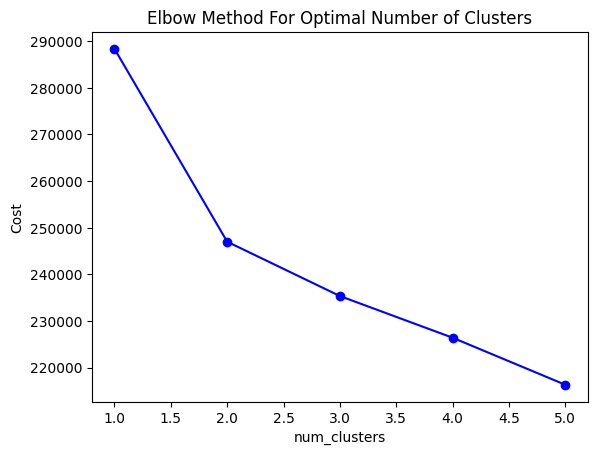

In [38]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [39]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [40]:
df.insert(0,"clusters",clusters,True)

df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,Age,BMI,Diabetes,age_group,map
0,0,1,0,0,0,0,1,0,12,1,0,3,2
1,0,0,2,0,0,0,1,1,17,3,0,4,4
2,0,0,2,0,0,0,0,1,14,1,0,4,2
3,1,1,0,0,0,0,1,1,10,2,0,3,5
4,0,0,0,0,0,0,0,0,10,1,0,3,0


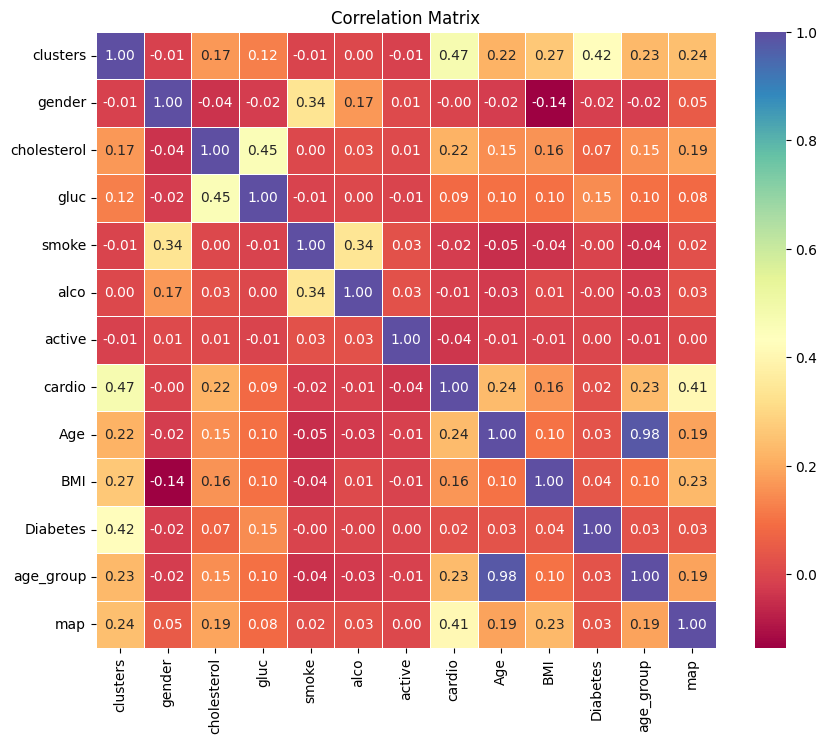

In [41]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

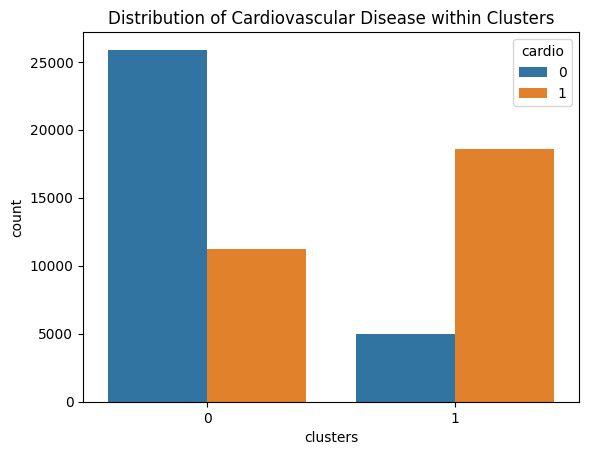

In [42]:
sns.countplot(x='clusters', hue='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()


In [43]:
x = df.drop(['cardio','gender','alco'], axis=1)
y = df['cardio']
x.head()

,clusters,cholesterol,gluc,smoke,active,Age,BMI,Diabetes,age_group,map
0,0,0,0,0,1,12,1,0,3,2
1,0,2,0,0,1,17,3,0,4,4
2,0,2,0,0,0,14,1,0,4,2
3,1,0,0,0,1,10,2,0,3,5
4,0,0,0,0,0,10,1,0,3,0


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48548 entries, 51283 to 38017
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     48548 non-null  uint16
 1   cholesterol  48548 non-null  int64 
 2   gluc         48548 non-null  int64 
 3   smoke        48548 non-null  int64 
 4   active       48548 non-null  int64 
 5   Age          48548 non-null  int64 
 6   BMI          48548 non-null  int64 
 7   Diabetes     48548 non-null  int64 
 8   age_group    48548 non-null  int64 
 9   map          48548 non-null  int64 
dtypes: int64(9), uint16(1)
memory usage: 3.8 MB


# **Random Forest**

Without CV


In [46]:
# build the model
rfModel = RandomForestClassifier(random_state=1)

# Fit the model
rfModel.fit(x_train, y_train)

# Make predictions
rf_pred = rfModel.predict(x_test)

# accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print(f"Accuracy without CV: {rf_accuracy:.2f}")

Accuracy without CV: 82.07


GridSearchCV est une technique de validation croisée (Cross-Validation) qui recherche les valeurs optimales des paramètres pour un modèle.

Original *param_grid* processed on faster machine:
> param_grid = {
>      'n_estimators': [100, 200, 300, 500],
>      'max_depth': [None, 10, 20, 30],
>      'min_samples_split': [2, 5, 10, 20],
>      'min_samples_leaf': [1, 2, 4, 8],
>      'max_features': ['sqrt', 'log2', None],
>  }
> 

> Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

In [47]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

#  Best parameters for RF
rf_best_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}

# Create grid search
rf_gridsearch = GridSearchCV(estimator=rfModel,param_grid=rf_best_params, cv=5, scoring='accuracy',n_jobs=-1)

# Fit grid search
rf_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [10],
                         'n_estimators': [100]},
             scoring='accuracy')

In [48]:
best_params = rf_gridsearch.best_params_
best_estimator = rf_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator  : RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10,
                       random_state=1)


In [49]:
import pickle

In [50]:
rf_pred_CV = best_estimator.predict(x_test)

In [51]:
rf_accuracy_cv = metrics.accuracy_score(y_test, rf_pred_CV)*100
print(f"Best Accuracy: {rf_accuracy_cv:.2f}")

Best Accuracy: 83.14


In [52]:
print(f"Random Forest accuracy without CV : {rf_accuracy:.2f}")
print(f"Random Forest accuracy with CV    : {rf_accuracy_cv:.2f}")

Random Forest accuracy without CV : 82.07
Random Forest accuracy with CV    : 83.14


In [53]:
# Sauvegarder le modèle dans un fichier .pkl
with open('memoirerandom_forest_model1.pkl', 'wb') as f:
    pickle.dump(best_estimator, f)

**Classification Report**

In [54]:
classification_report_str = classification_report(y_test, rf_pred_CV, digits=4)

print("Classification Report for RF with CV:\n", classification_report_str)

Classification Report for RF with CV:
               precision    recall  f1-score   support

           0     0.8194    0.8525    0.8356      6100
           1     0.8446    0.8102    0.8270      6038

    accuracy                         0.8314     12138
   macro avg     0.8320    0.8313    0.8313     12138
weighted avg     0.8319    0.8314    0.8314     12138



# **MLP**

Without CV

In [55]:
# build MLP modelWithout CV
mlpModel = MLPClassifier(random_state=1)

# Fit the model
mlpModel.fit(x_train, y_train)

# Make predictions
mlp_pred = mlpModel.predict(x_test)

# accuracy
mlp_accuracy = metrics.accuracy_score(y_test, mlp_pred)*100
print(f"Accuracy without CV: {mlp_accuracy:.2f}")

Accuracy without CV: 82.17


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
# mlp_params = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam'],
#     'max_iter': [100, 200, 300],
#     'alpha': [0.0001, 0.001, 0.01],
# }

# Best parameters for MLP
mlp_best_params = {
    'activation': ['tanh'],
    'alpha': [0.01],
    'hidden_layer_sizes': [(50, 50)],
    'max_iter': [300],
    'solver': ['adam'],
}

# Create grid search
mlp_gridsearch = GridSearchCV(estimator=mlpModel, param_grid=mlp_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
mlp_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.01],
                         'hidden_layer_sizes': [(50, 50)], 'max_iter': [300],
                         'solver': ['adam']},
             scoring='accuracy')

In [57]:
# mlp_best_params = mlp_gridsearch.best_params_
mlp_best_estimator = mlp_gridsearch.best_estimator_

print(f"Best Parameters : {mlp_best_params}")
print(f"Best Estimator  : {mlp_best_estimator}")

Best Parameters : {'activation': ['tanh'], 'alpha': [0.01], 'hidden_layer_sizes': [(50, 50)], 'max_iter': [300], 'solver': ['adam']}
Best Estimator  : MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50),
              max_iter=300, random_state=1)


In [58]:
mlp_pred_CV = mlp_best_estimator.predict(x_test)

In [59]:
# Sauvegarder le modèle dans un fichier .pkl
with open('memoireMLP_model.pkl', 'wb') as f:
    pickle.dump(mlp_best_estimator, f)

In [60]:
mlp_accuracy_cv = metrics.accuracy_score(y_test, mlp_pred_CV)*100
print(f"Best Accuracy: {mlp_accuracy_cv:.2f}")

Best Accuracy: 82.90


**MLP** Accuracy Scores

In [61]:
print(f"MLP accuracy without CV : {mlp_accuracy:.2f}")
print(f"MLP accuracy with CV    : {mlp_accuracy_cv:.2f}")

MLP accuracy without CV : 82.17
MLP accuracy with CV    : 82.90


**Classification Report**

In [62]:
classification_report_str = classification_report(y_test, mlp_pred_CV, digits=4)

print("Classification Report for MLP with CV:\n", classification_report_str)

Classification Report for MLP with CV:
               precision    recall  f1-score   support

           0     0.8027    0.8746    0.8371      6100
           1     0.8607    0.7829    0.8199      6038

    accuracy                         0.8290     12138
   macro avg     0.8317    0.8287    0.8285     12138
weighted avg     0.8316    0.8290    0.8286     12138



# **SVM**

Without CV

In [63]:
#Without CV build SVM model
svmModel = SVC(random_state=1)

# Fit the model
svmModel.fit(x_train, y_train)

# Make predictions
svm_pred = mlpModel.predict(x_test)

# accuracy
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print(f"Accuracy without CV: {svm_accuracy:.2f}")

Accuracy without CV: 82.17


In [64]:

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

svm_best_params = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': ['auto'],
}

# Create grid search
svm_gridsearch = GridSearchCV(estimator=svmModel, param_grid=svm_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
svm_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [10], 'gamma': ['auto'], 'kernel': ['rbf']},
             scoring='accuracy')

Get Best parameters and best estimator for SVM from GridSearchCV

In [65]:
svm_best_params = svm_gridsearch.best_params_
svm_best_estimator = svm_gridsearch.best_estimator_

print(f"Best Parameters : {svm_best_params}")
print(f"Best Estimator  : {svm_best_estimator}")

Best Parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator  : SVC(C=10, gamma='auto', random_state=1)


In [66]:
svm_pred_CV = svm_best_estimator.predict(x_test)

In [67]:
# Sauvegarder le modèle dans un fichier .pkl
with open('memoiresvm_model.pkl', 'wb') as f:
    pickle.dump(svm_best_estimator, f)

Accuracy

In [68]:
svm_accuracy_cv = metrics.accuracy_score(y_test, svm_pred_CV)*100
print(f"Best Accuracy: {svm_accuracy_cv:.2f}")

Best Accuracy: 82.77


**SVM** Accuracy Scores

In [69]:

print(f"SVM accuracy without CV : {svm_accuracy:.2f}")
print(f"SVM accuracy with CV    : {svm_accuracy_cv:.2f}")

SVM accuracy without CV : 82.17
SVM accuracy with CV    : 82.77


**Classification Report**

In [70]:
classification_report_str = classification_report(y_test, svm_pred_CV, digits=4)

print("Classification Report for SVM with CV:\n", classification_report_str)

Classification Report for SVM with CV:
               precision    recall  f1-score   support

           0     0.8153    0.8497    0.8321      6100
           1     0.8414    0.8056    0.8231      6038

    accuracy                         0.8277     12138
   macro avg     0.8283    0.8276    0.8276     12138
weighted avg     0.8283    0.8277    0.8276     12138



**KNN**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Créer un modèle KNN
knnModel = KNeighborsClassifier()

# Adapter le modèle aux données d'entraînement
knnModel.fit(x_train, y_train)

# Faire des prédictions
knn_pred = knnModel.predict(x_test)

# Calculer l'exactitude
knn_accuracy = metrics.accuracy_score(y_test, knn_pred) * 100
print(f"Précision sans validation croisée : {knn_accuracy:.2f}")


Précision sans validation croisée : 79.37


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knn_best_params = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'algorithm': ['auto'],
}

# Créer la recherche sur grille (grid search)
knn_gridsearch = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Ajuster la recherche sur grille aux données d'entraînement
knn_gridsearch.fit(x_train, y_train)

# Obtenir les meilleurs paramètres
best_params = knn_gridsearch.best_params_
print("Meilleurs paramètres:", best_params)


Meilleurs paramètres: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


In [73]:
knn_best_estimator = knn_gridsearch.best_estimator_

In [74]:
Kn_pred_CV = knn_best_estimator.predict(x_test)

In [75]:
# Sauvegarder le modèle dans un fichier .pkl
with open('memoireknn_model.pkl', 'wb') as f:
    pickle.dump(knn_best_estimator, f)

Accuracy

In [76]:
knn_accuracy_cv = metrics.accuracy_score(y_test, Kn_pred_CV)*100
print(f"Best Accuracy: {knn_accuracy_cv:.2f}")

Best Accuracy: 79.37


**KNN** Accuracy Scores

In [77]:
print(f"Knn accuracy without CV : {knn_accuracy:.2f}")
print(f"Knn accuracy with CV    : {knn_accuracy_cv:.2f}")

Knn accuracy without CV : 79.37
Knn accuracy with CV    : 79.37


**Classification Report**

In [78]:
classification_report_str = classification_report(y_test, Kn_pred_CV, digits=4)

print("Classification Report for KNN with CV:\n", classification_report_str)

Classification Report for KNN with CV:
               precision    recall  f1-score   support

           0     0.7869    0.8085    0.7975      6100
           1     0.8010    0.7787    0.7897      6038

    accuracy                         0.7937     12138
   macro avg     0.7939    0.7936    0.7936     12138
weighted avg     0.7939    0.7937    0.7937     12138



**Arbre de décision**


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Créer un modèle d'arbre de décision
treeModel = DecisionTreeClassifier(random_state=1)

# Adapter le modèle aux données d'entraînement
treeModel.fit(x_train, y_train)

# Faire des prédictions
tree_pred = treeModel.predict(x_test)

# Calculer l'exactitude
tree_accuracy = metrics.accuracy_score(y_test, tree_pred) * 100
print(f"Précision sans validation croisée : {tree_accuracy:.2f}")


Précision sans validation croisée : 81.18


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres pour l'arbre de décision
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Créer un modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=1)

# Créer une instance de GridSearchCV
tree_gridsearch = GridSearchCV(estimator=tree_model, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajuster GridSearchCV aux données d'entraînement
tree_gridsearch.fit(x_train, y_train)

# Obtenir les meilleurs paramètres
best_params = tree_gridsearch.best_params_
print("Meilleurs paramètres:", best_params)


Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [81]:

tree_best_estimator = tree_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {tree_best_estimator}")

Best Parameters : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator  : DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)


In [82]:
tree_pred_CV = tree_best_estimator.predict(x_test)
# Sauvegarder le modèle dans un fichier .pkl
with open('memoireTree_model.pkl', 'wb') as f:
    pickle.dump(tree_best_estimator, f)

In [83]:
tree_accuracy_cv = metrics.accuracy_score(y_test, tree_pred_CV)*100
print(f"Best Accuracy: {tree_accuracy_cv:.2f}")

Best Accuracy: 83.14


In [84]:

print(f"tree accuracy without CV : {tree_accuracy:.2f}")
print(f"tree accuracy with CV    : {tree_accuracy_cv:.2f}")

tree accuracy without CV : 81.18
tree accuracy with CV    : 83.14


**Classification Report**

In [85]:
classification_report_str = classification_report(y_test, tree_pred_CV, digits=4)

print("Classification Report for tree with CV:\n", classification_report_str)

Classification Report for tree with CV:
               precision    recall  f1-score   support

           0     0.8198    0.8516    0.8354      6100
           1     0.8440    0.8109    0.8271      6038

    accuracy                         0.8314     12138
   macro avg     0.8319    0.8313    0.8313     12138
weighted avg     0.8318    0.8314    0.8313     12138



LogisticRegression

In [ ]:
LogisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Créer un modèle de régression logistique
logisticModel = LogisticRegression(random_state=1)

# Adapter le modèle aux données d'entraînement
logisticModel.fit(x_train, y_train)

# Faire des prédictions
logistic_pred = logisticModel.predict(x_test)

# Calculer l'exactitude
logistic_accuracy = metrics.accuracy_score(y_test, logistic_pred) * 100
print(f"Précision sans validation croisée : {logistic_accuracy:.2f}")


Précision sans validation croisée : 77.65


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres pour la régression logistique
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Créer un modèle de régression logistique
logistic_model = LogisticRegression(random_state=1)

# Créer une instance de GridSearchCV
logistic_gridsearch = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajuster GridSearchCV aux données d'entraînement
logistic_gridsearch.fit(x_train, y_train)

# Obtenir les meilleurs paramètres
best_params = logistic_gridsearch.best_params_
print("Meilleurs paramètres:", best_params)


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

Meilleurs paramètres: {'C': 0.1, 'penalty': 'l2'}


In [88]:

logistic_best_estimator = logistic_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {logistic_best_estimator}")

Best Parameters : {'C': 0.1, 'penalty': 'l2'}
Best Estimator  : LogisticRegression(C=0.1, random_state=1)


In [89]:
logistic_pred_CV = logistic_best_estimator.predict(x_test)
# Sauvegarder le modèle dans un fichier .pkl
with open('memoireLogistic_model.pkl', 'wb') as f:
    pickle.dump(logistic_best_estimator, f)

In [90]:
logistic_accuracy_cv = metrics.accuracy_score(y_test, logistic_pred_CV)*100
print(f"Best Accuracy: {logistic_accuracy_cv:.2f}")
print(f"tree accuracy without CV : {logistic_accuracy:.2f}")
print(f"tree accuracy with CV    : {logistic_accuracy_cv:.2f}")

Best Accuracy: 77.63
tree accuracy without CV : 77.65
tree accuracy with CV    : 77.63


**Classification Report**

In [91]:
classification_report_str = classification_report(y_test, logistic_pred_CV, digits=4)

print("Classification Report for logistic with CV:\n", classification_report_str)

Classification Report for logistic with CV:
               precision    recall  f1-score   support

           0     0.7629    0.8052    0.7835      6100
           1     0.7915    0.7471    0.7687      6038

    accuracy                         0.7763     12138
   macro avg     0.7772    0.7762    0.7761     12138
weighted avg     0.7771    0.7763    0.7761     12138



**Accuracy of all three models**

In [92]:
print(f"RF accuracy with CV    : {rf_accuracy_cv:.2f}")
print(f"MLP accuracy with CV   : {mlp_accuracy_cv:.2f}")
print(f"SVM accuracy with CV   : {svm_accuracy_cv:.2f}")
print(f"Knn accuracy with CV   : {knn_accuracy_cv:.2f}")
print(f"Tree accuracy with CV   : {tree_accuracy_cv:.2f}")
print(f"Logistic accuracy with CV   : {logistic_accuracy_cv:.2f}")

RF accuracy with CV    : 83.14
MLP accuracy with CV   : 82.90
SVM accuracy with CV   : 82.77
Knn accuracy with CV   : 79.37
Tree accuracy with CV   : 83.14
Logistic accuracy with CV   : 77.63


**Visualization**

RF

Text(0.5, 427.9555555555555, 'Predicted label')

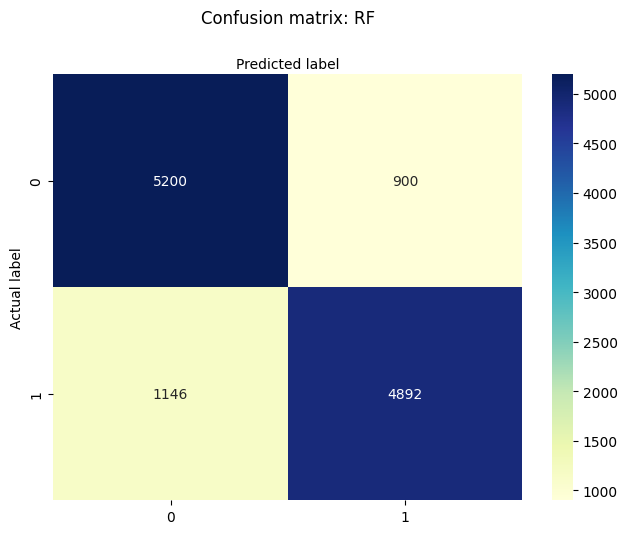

In [93]:
cnf_matrix = metrics.confusion_matrix(y_test, rf_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ML

Text(0.5, 427.9555555555555, 'Predicted label')

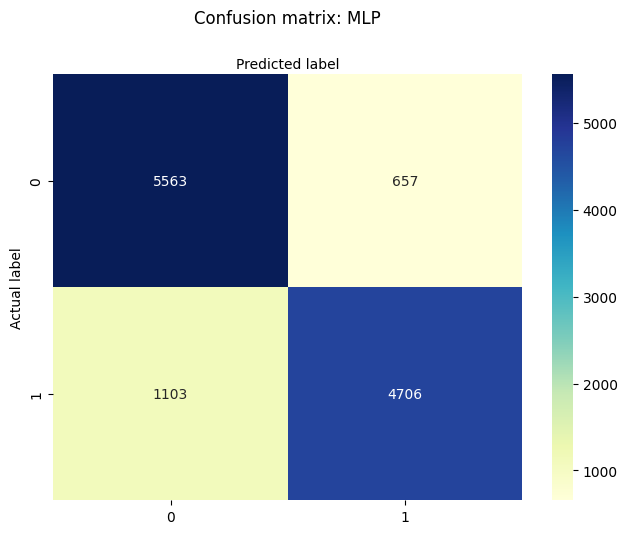

In [86]:
cnf_matrix = metrics.confusion_matrix(y_test, mlp_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

SVM

Text(0.5, 427.9555555555555, 'Predicted label')

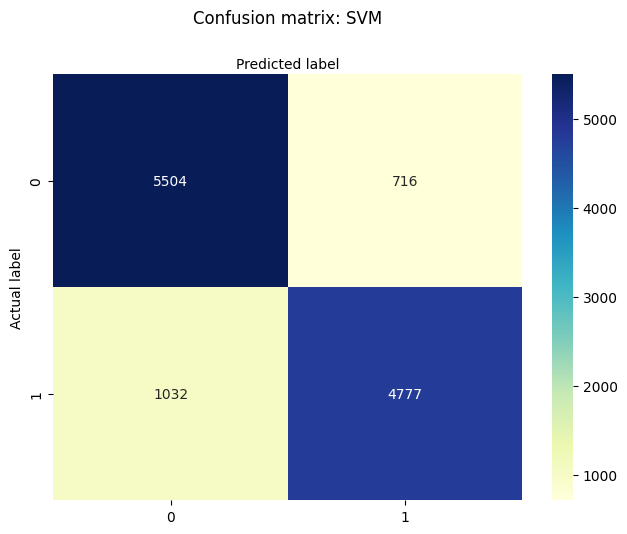

In [87]:
cnf_matrix = metrics.confusion_matrix(y_test, svm_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

KNN

Text(0.5, 427.9555555555555, 'Predicted label')

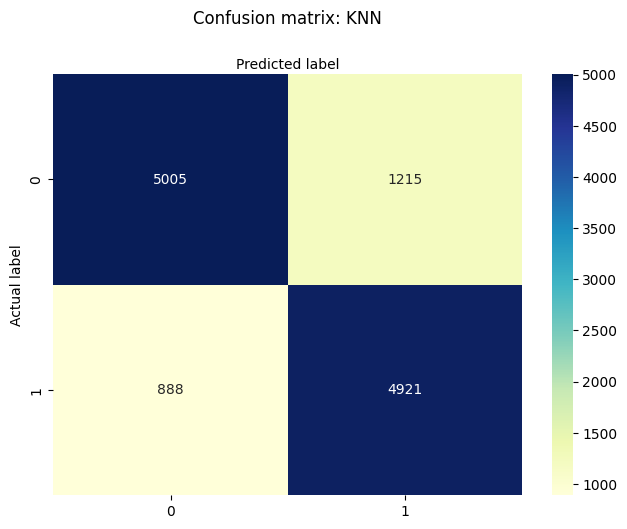

In [88]:
cnf_matrix = metrics.confusion_matrix(y_test, Kn_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Arbre

Text(0.5, 427.9555555555555, 'Predicted label')

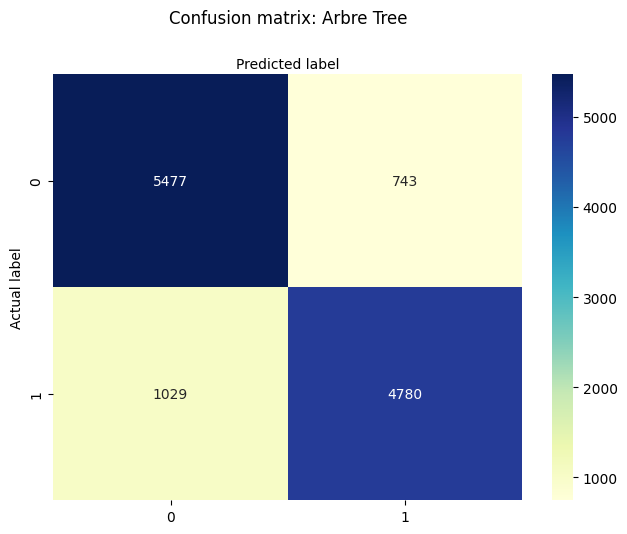

In [89]:
cnf_matrix = metrics.confusion_matrix(y_test, tree_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: Arbre Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Logistic

Text(0.5, 427.9555555555555, 'Predicted label')

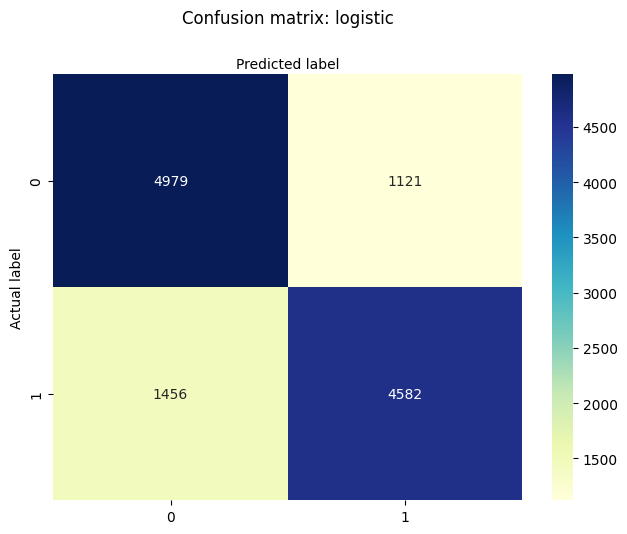

In [76]:
cnf_matrix = metrics.confusion_matrix(y_test, logistic_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: logistic', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
X = df.copy()
y = df['cardio']
X.drop(columns="cardio",inplace=True)
X.shape,y.shape

((60686, 12), (60686,))

In [95]:
x = df.drop(['cardio','gender','alco'], axis=1)

In [96]:
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state=42,
stratify=y)
#train = pd.concat([X_train,y_train],axis=1)
#test = pd.concat([X_test,y_test],axis=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48548, 12), (12138, 12), (48548,), (12138,))

In [97]:
data = X_train.copy()
data["target"] = y_train
data.shape

(48548, 13)

In [98]:
from pycaret.classification import setup, create_model



ImportError: cannot import name '_format_load_msg' from 'joblib.memory' (C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\memory.py)

In [99]:
s = setup(data,
target='target',

categorical_features = ['clusters','gender','cholesterol','gluc','smoke','active','age_group','BMI','map','Diabetes'],
session_id=42,
train_size = 0.9, 
data_split_shuffle=True,
remove_multicollinearity=True,
remove_outliers=True,
normalize=True,
normalize_method="robust",
use_gpu=False,
fix_imbalance=True)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(48113, 12)"
4,Transformed data shape,"(47578, 32)"
5,Transformed train set shape,"(42766, 32)"
6,Transformed test set shape,"(4812, 32)"
7,Ordinal features,5
8,Numeric features,1
9,Categorical features,10


In [101]:
from pycaret.classification import *

In [102]:
best_models = compare_models(cross_validation=True,
                            fold=5,
                            sort="Accuracy",
                            n_select=1,
                            )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:12:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8534,0.0000,0.8042,0.8851,0.8427,0.7060,0.7089,5.7080
lda,Linear Discriminant Analysis,0.8534,0.9382,0.8039,0.8853,0.8426,0.7060,0.7089,5.2700
lr,Logistic Regression,0.8533,0.9397,0.8186,0.8730,0.8449,0.7060,0.7073,9.0160
gbc,Gradient Boosting Classifier,0.8533,0.9397,0.8209,0.8711,0.8453,0.7060,0.7071,7.6980
ada,Ada Boost Classifier,0.8529,0.9384,0.8106,0.8787,0.8433,0.7051,0.7072,6.2980
lightgbm,Light Gradient Boosting Machine,0.8520,0.9389,0.8291,0.8624,0.8455,0.7036,0.7041,5.7000
svm,SVM - Linear Kernel,0.8494,0.0000,0.7817,0.8967,0.8353,0.6978,0.7034,5.7420
rf,Random Forest Classifier,0.8446,0.9274,0.8183,0.8570,0.8372,0.6887,0.6894,7.2220
et,Extra Trees Classifier,0.8426,0.9176,0.8065,0.8622,0.8334,0.6846,0.6860,7.6500
dt,Decision Tree Classifier,0.8396,0.9103,0.7999,0.8617,0.8296,0.6785,0.6802,5.3780


In [103]:
best_model = create_model(estimator="gbc",
            fold=5,
            cross_validation=True,
            )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8581,0.9408,0.8267,0.8758,0.8505,0.7157,0.7168
1,0.8604,0.9447,0.8276,0.8794,0.8527,0.7203,0.7214
2,0.8482,0.9383,0.8148,0.8662,0.8397,0.6957,0.6969
3,0.8500,0.9380,0.8162,0.8686,0.8416,0.6994,0.7006
4,0.8498,0.9365,0.8193,0.8658,0.8419,0.6990,0.7000
Mean,0.8533,0.9397,0.8209,0.8711,0.8453,0.7060,0.7071
Std,0.0050,0.0029,0.0053,0.0054,0.0053,0.0099,0.0100


In [104]:
tuned_gbc = tune_model(estimator=best_model,
                       round=10,
                       fold=10,
                       optimize="AUC",
                       search_library="optuna",
                       search_algorithm="tpe",
                       choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8610020780,0.9447029342,0.8288416076,0.8795785248,0.8534566699,0.7214867757,0.7226387848
1,0.8551963048,0.9365726043,0.8245033113,0.8719359680,0.8475565281,0.7098685784,0.7108757921
2,0.8635103926,0.9463126603,0.8320719016,0.8817042607,0.8561693843,0.7265149175,0.7276189704
3,0.8579676674,0.9438703085,0.8311258278,0.8719602978,0.8510535239,0.7154709562,0.7162226126
4,0.8510392610,0.9407715539,0.8107852412,0.8749361919,0.8416400687,0.7014092572,0.7032219289
5,0.8471131640,0.9374372415,0.8278145695,0.8544921875,0.8409418549,0.6938365713,0.6941600229
6,0.8473441109,0.9372132107,0.8079470199,0.8700967906,0.8378709836,0.6940157022,0.6957174045
7,0.8545034642,0.9397384934,0.8311258278,0.8655172414,0.8479729730,0.7085788639,0.7091143768
8,0.8510392610,0.9383953760,0.8136234626,0.8726534754,0.8421052632,0.7014483260,0.7029899812


[I 2024-02-23 18:24:39,230] Searching the best hyperparameters using 43301 samples...
[I 2024-02-23 18:41:31,668] Finished hyperparameter search!


In [105]:
prediction = predict_model(tuned_gbc,X_test)
prediction

,clusters,gender,cholesterol,gluc,smoke,alco,active,BMI,Diabetes,age_group,map,prediction_label,prediction_score
2505,0,1,0,0,1,0,1,2,0,5,1,0,0.9925
17975,1,1,0,0,0,0,1,2,0,5,4,1,0.9966
21357,1,1,0,0,0,0,1,2,1,6,5,1,0.8330
58917,1,1,2,0,1,0,1,2,0,3,3,1,0.9962
62064,1,1,1,0,0,0,1,2,1,2,2,0,0.5915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,0,0,0,0,0,0,1,1,0,5,2,0,0.6134
15457,0,0,0,0,0,0,1,1,1,1,2,0,0.9977
32051,0,1,0,0,0,0,1,1,1,5,2,0,0.9939
19649,1,1,2,2,0,0,1,2,1,3,2,1,0.6088


In [107]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score

In [108]:
def model_eval(prediction,test):
    print("Classification Report: ")
    print(classification_report(test,prediction))
    print('Train Accuracy score: {0:0.2f}'.format(accuracy_score(test, prediction)))
    print('Train ROC AUC score: {0:0.2f}'.format(roc_auc_score(test, prediction)))


model_eval(prediction.prediction_label,y_test)


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6156
           1       0.86      0.81      0.84      5873

    accuracy                           0.85     12029
   macro avg       0.85      0.85      0.85     12029
weighted avg       0.85      0.85      0.85     12029

Train Accuracy score: 0.85
Train ROC AUC score: 0.85


In [109]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [110]:
save_model(tuned_gbc,
           "code")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['alco'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['clusters', 'ge...
                                             loss='log_loss', max_depth=3,
                                         

In [111]:
model = load_model("code")

Transformation Pipeline and Model Successfully Loaded


In [112]:
prediction = predict_model(model,X_test)
model_eval(prediction.prediction_label,y_test)

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6156
           1       0.86      0.81      0.84      5873

    accuracy                           0.85     12029
   macro avg       0.85      0.85      0.85     12029
weighted avg       0.85      0.85      0.85     12029

Train Accuracy score: 0.85
Train ROC AUC score: 0.85
